In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [40]:
# Initialize weights and bias
np.random.seed(0)
w = np.random.rand(X_train_scaled.shape[1], y_train_one_hot.shape[1])
b = np.random.rand(y_train_one_hot.shape[1])

# Define hyperparameters
lr = 0.01
num_epochs = 10000
lambda_reg = 0.01

In [41]:
# Define loss function with regularization
def loss(X, y, w, b, lambda_reg):
    z = X.dot(w) + b
    regularization = lambda_reg/2 * np.sum(w**2)
    return -np.mean(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z))) + regularization

# Define gradient with regularization
def gradient(X, y, w, b, lambda_reg):
    z = X.dot(w) + b
    grad_w = X.T.dot(sigmoid(z) - y) / y.size + lambda_reg * w
    grad_b = np.mean(sigmoid(z) - y)
    return grad_w, grad_b


In [42]:
# Train model
train_loss_history = []
test_loss_history = []
for i in range(num_epochs):
    # Compute gradients and update weights and bias
    grad_w, grad_b = gradient(X_train_scaled, y_train_one_hot, w, b, lambda_reg)
    w -= lr * grad_w
    b -= lr * grad_b
    
    # Compute and store training loss
    train_loss = loss(X_train_scaled, y_train_one_hot, w, b, lambda_reg)
    train_loss_history.append(train_loss)
    
    # Compute and store testing loss
    test_loss = loss(X_test_scaled, y_test_one_hot, w, b, lambda_reg)
    test_loss_history.append(test_loss)

C:\Users\raksh\AppData\Local\Temp/ipykernel_15320/3153635096.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z))) + regularization


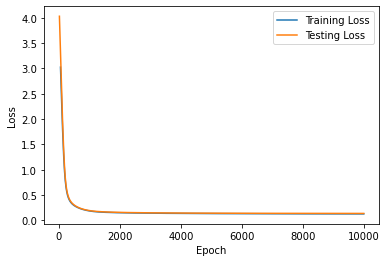

In [43]:
# Plot loss curves
plt.plot(train_loss_history, label='Training Loss')
plt.plot(test_loss_history, label='Testing Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:


# Compute F1 score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1score:.5f}')


F1 score: 0.94752
